## LogReg

# TODO: Add scaling

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,f1_score,confusion_matrix,recall_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
                            f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, \
                            ConfusionMatrixDisplay, RocCurveDisplay
import re

## Loading & Manipulating Data

In [2]:
## Loading in data
data = pd.read_csv("data/final_restaurant_rating_data.csv")
data.head()

,overall_rating,average_rating,average_rating_category,is_travellors_choice,is_michellin,is_in_mall,walking_distance,region_bedok,region_bishan_toa_payoh,region_bugis_city_hall,...,operates_on_sat_or_sun,average_sentiment_score,img_uploaded_per_review,proportion_of_positive_sentiment,nearest_train_line_color_blue,nearest_train_line_color_green,nearest_train_line_color_others,nearest_train_line_color_purple,nearest_train_line_color_red,nearest_train_line_color_yellow
0,4.0,3.8,0,0,0,0.0,744.5,0.0,0.0,0.0,...,1,0.276577,0.071429,0.857143,1.0,0.0,0.0,0.0,0.0,0.0
1,5.0,4.8,1,1,0,0.0,373.3,0.0,0.0,1.0,...,1,0.405635,0.292683,0.982927,0.0,0.0,0.0,0.0,0.0,1.0
2,4.5,4.7,1,1,0,0.0,227.9,0.0,0.0,0.0,...,1,0.424801,0.517665,0.971582,0.0,1.0,0.0,0.0,0.0,0.0
3,5.0,4.9,1,0,0,1.0,318.7,0.0,0.0,0.0,...,1,0.499230,0.909465,0.987654,0.0,0.0,0.0,0.0,0.0,1.0
4,5.0,4.8,1,1,0,0.0,1399.9,0.0,0.0,0.0,...,1,0.487331,0.605475,0.977456,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
## Datapoint with no sentiment score
data = data.drop([4765],axis=0).reset_index() ##7191

In [4]:
data.shape

(7191, 112)

In [5]:
X = data.drop(columns=["overall_rating","average_rating","average_rating_category","proportion_of_positive_sentiment","has_price_category"])
y = data["average_rating_category"]

In [6]:
X['average_sentiment_score'] = (X['average_sentiment_score'] + 1)/2

In [7]:
min_max_scaling_list = ['walking_distance','total_operating_hours','num_of_days_open','average_daily_operating_hours','img_uploaded_per_review']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X[min_max_scaling_list])

scaled_df = pd.DataFrame(scaled_data,columns=min_max_scaling_list)
pd.concat([X.drop(min_max_scaling_list,axis=1), scaled_df], axis=1)

,index,is_travellors_choice,is_michellin,is_in_mall,region_bedok,region_bishan_toa_payoh,region_bugis_city_hall,region_bukit_merah_southern_islands,region_bukit_timah,region_changi,...,nearest_train_line_color_green,nearest_train_line_color_others,nearest_train_line_color_purple,nearest_train_line_color_red,nearest_train_line_color_yellow,walking_distance,total_operating_hours,num_of_days_open,average_daily_operating_hours,img_uploaded_per_review
0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.044563,0.458333,1.000000,0.458333,0.017857
1,1,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.022336,0.116071,0.857143,0.135417,0.073171
2,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.013629,0.375000,1.000000,0.375000,0.129416
3,3,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.019066,0.500000,1.000000,0.500000,0.227366
4,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.083809,0.130952,1.000000,0.130833,0.151369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7186,7187,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.025360,0.000000,0.000000,0.000000,0.045343
7187,7188,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.032024,0.000000,0.000000,0.000000,0.135246
7188,7189,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.020551,0.000000,0.000000,0.000000,0.071888
7189,7190,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.018952,0.666667,1.000000,0.666667,0.094340


In [8]:
OHE_list = ['price_category']

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
oh_data = ohe.fit_transform(X[OHE_list]).toarray()
names = ['price_category_0', 'price_category_1', 'price_category_2', 'price_category_3']

oh_df = pd.DataFrame(oh_data,columns=names)
X = pd.concat([X.drop(OHE_list,axis=1), oh_df], axis=1)
X

,index,is_travellors_choice,is_michellin,is_in_mall,walking_distance,region_bedok,region_bishan_toa_payoh,region_bugis_city_hall,region_bukit_merah_southern_islands,region_bukit_timah,...,nearest_train_line_color_blue,nearest_train_line_color_green,nearest_train_line_color_others,nearest_train_line_color_purple,nearest_train_line_color_red,nearest_train_line_color_yellow,price_category_0,price_category_1,price_category_2,price_category_3
0,0,0,0,0.0,744.5,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,0,0.0,373.3,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2,1,0,0.0,227.9,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,0,0,1.0,318.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,1,0,0.0,1399.9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7186,7187,0,0,0.0,423.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7187,7188,0,0,0.0,535.1,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7188,7189,0,0,0.0,343.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7189,7190,0,0,0.0,316.8,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
X, X_holdout, y, y_holdout = train_test_split(X, y, test_size=0.15, random_state=2022, stratify=y)

In [10]:
X.head()

,index,is_travellors_choice,is_michellin,is_in_mall,walking_distance,region_bedok,region_bishan_toa_payoh,region_bugis_city_hall,region_bukit_merah_southern_islands,region_bukit_timah,...,nearest_train_line_color_blue,nearest_train_line_color_green,nearest_train_line_color_others,nearest_train_line_color_purple,nearest_train_line_color_red,nearest_train_line_color_yellow,price_category_0,price_category_1,price_category_2,price_category_3
827,827,0,0,1.0,858.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1426,1426,0,0,0.0,278.1,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2134,2134,0,0,0.0,360.3,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4921,4922,0,0,0.0,684.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4676,4676,0,0,0.0,3096.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [11]:
X.columns

Index(['index', 'is_travellors_choice', 'is_michellin', 'is_in_mall',
       'walking_distance', 'region_bedok', 'region_bishan_toa_payoh',
       'region_bugis_city_hall', 'region_bukit_merah_southern_islands',
       'region_bukit_timah',
       ...
       'nearest_train_line_color_blue', 'nearest_train_line_color_green',
       'nearest_train_line_color_others', 'nearest_train_line_color_purple',
       'nearest_train_line_color_red', 'nearest_train_line_color_yellow',
       'price_category_0', 'price_category_1', 'price_category_2',
       'price_category_3'],
      dtype='object', length=110)

## Helper Functions

In [12]:
def evaluate_results(y_test, y_pred, y_proba, plot_confusion_matrix=True, plot_roc=False, title="Classification Results"):
    '''
    This is a helper function that we will call to print basic results statistics.
    '''
    # Create confusion matrix of validation data
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    print("Confusion Matrix:")
    if plot_confusion_matrix:
        disp = ConfusionMatrixDisplay(cm, display_labels=["Poor [0]", "Excellent [1]"])
        disp.plot(cmap=plt.cm.OrRd)
        plt.title(title,pad=5)
        plt.show()
    else:
        print(cm)
    print("TN: %s, FP: %s, FN: %s, TP: %s" %(TN, FP, FN, TP))

    # Evaluation Statistics
    # Performance of decision tree model on validation data
    print("Accuracy: {:.5f}".format(accuracy_score(y_test, y_pred)))
    print("Recall: {:.5f}".format(recall_score(y_test, y_pred)))
    print("Precision: {:.5f}".format(precision_score(y_test, y_pred)))
    print("F1: {:.5f}".format(f1_score(y_test, y_pred)))
    print("ROC_AUC: {:.5f}".format(roc_auc_score(y_test, y_proba)))      # pass in probability
    
    if plot_roc:
        disp = RocCurveDisplay.from_predictions(y_test,y_proba)
        plt.show()
def stratified_k_fold_model_fit(X, Y, model, splits=5, shuffle=False, verbose=True, plot_confusion_matrix=True, plot_roc=True, hide_fold_result=False, title=None):
    X = np.array(X)
    Y = np.array(Y)

    if shuffle:
        kf = StratifiedKFold(n_splits=splits, shuffle=shuffle, random_state=2022)
        kf.get_n_splits(X, Y)
    else:
        kf = StratifiedKFold(n_splits=splits, shuffle=shuffle)
        kf.get_n_splits(X, Y)
    
    # ----- Test ----- #
    auc_scores = [] # AUC scores
    all_y_preds = [] # predictions
    all_y_proba = [] # probabilities
    all_y_true = [] # true labels

    # ----- Train ----- #
    train_auc_scores = [] # AUC scores
    train_y_preds = [] # predictions
    train_y_proba = [] # probabilities
    train_true = [] # true labels

    for train, test in kf.split(X, Y):
        # get the current train and test sets (for this particular fold)
        X_train, Y_train = X[train], Y[train]
        X_test, Y_test = X[test], Y[test]
        
        model_fit = model.fit(X_train, Y_train.ravel())

        # predict on training set
        y_pred_train = model_fit.predict(X_train)
        y_proba_train = model_fit.predict_proba(X_train)
        train_y_preds.extend(y_pred_train)
        train_y_proba.extend(y_proba_train[:, 1])
        train_true.extend(Y_train)
        
        # predict on validation set
        # y_pred = model_fit.predict(X_test)
        y_proba = model_fit.predict_proba(X_test)
        y_pred = [1 if y_prob >= 0.5 else 0 for y_prob in y_proba[:, 1]]

        if verbose and not hide_fold_result:
            print('-'*20 + ' Fold Result' + '-'*20)
            evaluate_results(Y_test, y_pred, y_proba[:, 1], plot_confusion_matrix=False, plot_roc=False, title=title)

        all_y_preds.extend(y_pred)
        all_y_proba.extend(y_proba[:, 1])
        all_y_true.extend(Y_test)
    
    # Evaluate results
    if verbose:
        print('-'*20 + ' Overall Train Result' + '-'*20)
        evaluate_results(train_true, train_y_preds, train_y_proba, plot_confusion_matrix=plot_confusion_matrix, plot_roc=plot_roc, title=title)
        print('-'*20 + ' Overall Test Result' + '-'*20)
        evaluate_results(all_y_true, all_y_preds, all_y_proba, plot_confusion_matrix=plot_confusion_matrix, plot_roc=plot_roc, title=title)
        
    return roc_auc_score(train_true, train_y_proba), roc_auc_score(all_y_true, all_y_proba)

## Model 0

-------------------- Overall Train Result--------------------
Confusion Matrix:


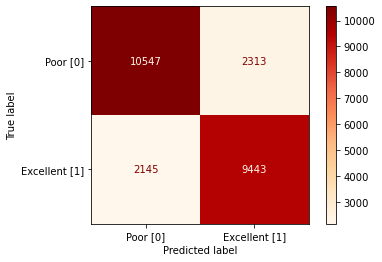

TN: 10547, FP: 2313, FN: 2145, TP: 9443
Accuracy: 0.81765
Recall: 0.81489
Precision: 0.80325
F1: 0.80903
ROC_AUC: 0.90332


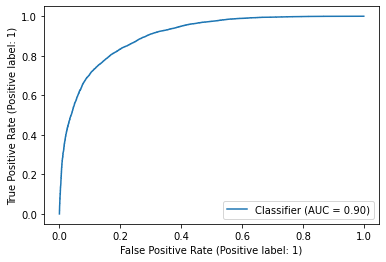

-------------------- Overall Test Result--------------------
Confusion Matrix:


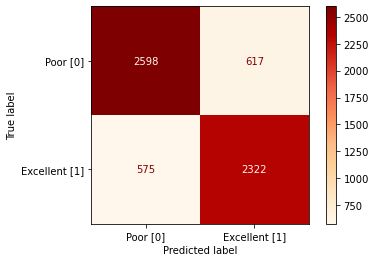

TN: 2598, FP: 617, FN: 575, TP: 2322
Accuracy: 0.80497
Recall: 0.80152
Precision: 0.79006
F1: 0.79575
ROC_AUC: 0.89283


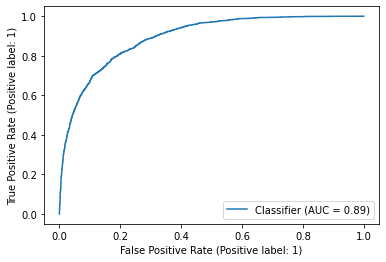

In [13]:
lr_model = LogisticRegression(penalty="l1" ,solver='liblinear',max_iter=2000)

roc_auc_train_model0, roc_auc_test_mode0 = stratified_k_fold_model_fit(X,y, lr_model, 5, shuffle=True, hide_fold_result=True)

## Model 1

In [14]:
## P-val > 0.05, can use for model
from sklearn.feature_selection import chi2
scores, pvalues = chi2(X, y)
pvalues

array([0.00000000e+00, 2.48714111e-49, 2.00037733e-10, 6.33241489e-28,
       0.00000000e+00, 2.82419950e-01, 3.86699383e-01, 8.57228232e-01,
       8.87877128e-01, 6.54739440e-01, 1.62057852e-01, 5.60451463e-03,
       1.29671806e-01, 8.71915925e-02, 2.27920920e-01, 1.61755789e-02,
       2.39617017e-01, 3.31819032e-04, 2.22642805e-06, 4.61166469e-01,
       1.82412735e-16, 3.10707138e-05, 3.67019454e-02, 6.02168797e-04,
       5.09700604e-01, 7.27298529e-01, 1.64841679e-05, 1.25022343e-01,
       1.24705434e-02, 5.96894307e-02, 1.08756691e-14, 1.98491922e-01,
       7.23922745e-01, 1.62867561e-03, 1.51951757e-02, 5.79043220e-01,
       8.37239273e-01, 4.04681329e-03, 2.38613329e-04, 6.28321276e-04,
       1.52386007e-12, 6.33017462e-01, 8.50145366e-01, 1.36376572e-04,
       1.87004723e-01, 5.90233272e-01, 1.32119116e-02, 9.09708960e-01,
       2.09639619e-01, 3.66475567e-01, 4.60737585e-01, 4.87122048e-02,
       2.79515293e-02, 5.51178330e-01, 6.02839256e-01, 2.18057559e-18,
      

In [15]:
pvals_df = pd.DataFrame(pvalues,index=X.columns).rename(columns={0:'Pval'})
pvals_df = pvals_df[pvals_df.Pval > 0.05] ## Variables that are dependent.

In [16]:
X_m1_train = X[pvals_df.index]

-------------------- Overall Train Result--------------------
Confusion Matrix:


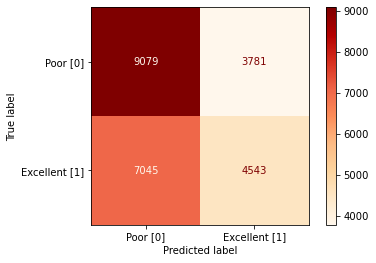

TN: 9079, FP: 3781, FN: 7045, TP: 4543
Accuracy: 0.55718
Recall: 0.39204
Precision: 0.54577
F1: 0.45631
ROC_AUC: 0.58050


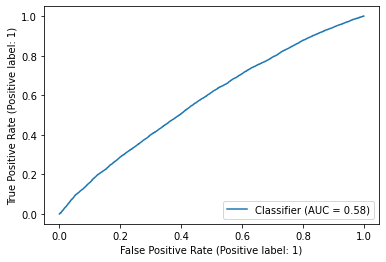

-------------------- Overall Test Result--------------------
Confusion Matrix:


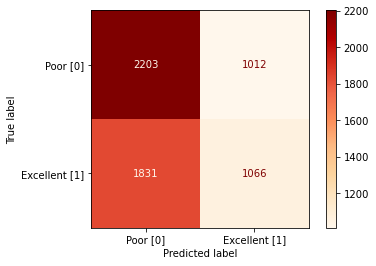

TN: 2203, FP: 1012, FN: 1831, TP: 1066
Accuracy: 0.53485
Recall: 0.36797
Precision: 0.51299
F1: 0.42854
ROC_AUC: 0.53953


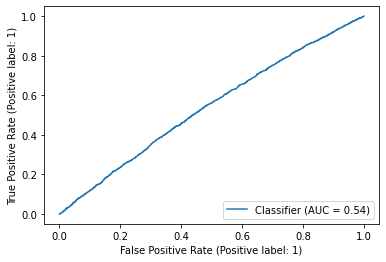

In [17]:
lr_model = LogisticRegression(penalty="l1" ,solver='liblinear',max_iter=2000)

roc_auc_train_model1, roc_auc_test_model1 = stratified_k_fold_model_fit(X_m1_train,y, lr_model, 5, shuffle=True, hide_fold_result=True)

## Model 2

In [18]:
param = {'C': [0.01,0.1,1,10,100,1000], 'penalty': ['l1']}

lr_model = LogisticRegression( solver='liblinear',max_iter=2000)
gs_model = GridSearchCV(estimator=lr_model, param_grid=param)
gs_model.fit(X,y)

# Train a LR model with best parameters
model = LogisticRegression(**gs_model.best_params_,max_iter=2000,solver='liblinear')
model.fit(X,y)

LogisticRegression(C=100, max_iter=2000, penalty='l1', solver='liblinear')

In [19]:
coef = model.coef_[0]
imp_features = pd.Series(X.columns)[list(coef!=0)]
X_m2_train = X[imp_features]

-------------------- Overall Train Result--------------------
Confusion Matrix:


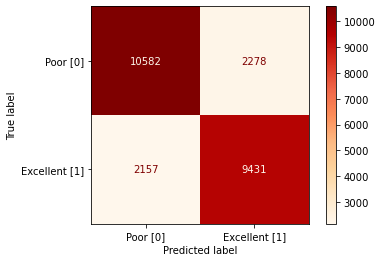

TN: 10582, FP: 2278, FN: 2157, TP: 9431
Accuracy: 0.81859
Recall: 0.81386
Precision: 0.80545
F1: 0.80963
ROC_AUC: 0.90398


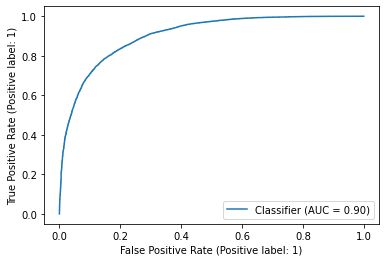

-------------------- Overall Test Result--------------------
Confusion Matrix:


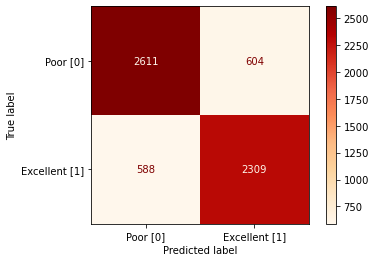

TN: 2611, FP: 604, FN: 588, TP: 2309
Accuracy: 0.80497
Recall: 0.79703
Precision: 0.79265
F1: 0.79484
ROC_AUC: 0.89196


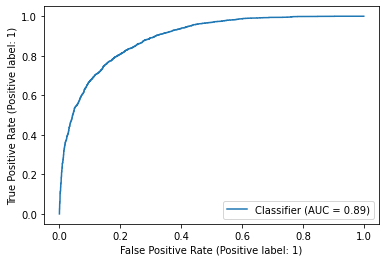

In [20]:
lr_model =  LogisticRegression(**gs_model.best_params_,max_iter=2000,solver='liblinear')

roc_auc_train_model2, roc_auc_test_model2 = stratified_k_fold_model_fit(X_m2_train,y, lr_model, 5, shuffle=True, hide_fold_result=True)

## Feature Importance

In [21]:
import seaborn as sns

sns.set_palette("rocket")
pal = sns.color_palette("rocket")
hex_colors = pal.as_hex()

In [22]:
target_rating_variable = [
    # 'overall_rating',
    # 'average_rating',
    'average_rating_category',
]

region_ohe = [
    'region_bedok',
    'region_bishan_toa_payoh',
    'region_bugis_city_hall',
    'region_bukit_merah_southern_islands',
    'region_bukit_timah',
    'region_changi',
    'region_downtown',
    'region_geylang',
    'region_kallang',
    'region_marina_bay',
    'region_marina_centre',
    'region_newton_orchard',
    'region_north_region',
    'region_northeast_region',
    'region_novena',
    'region_outram',
    'region_paya_lebar_tampines_pasir_ris',
    'region_queenstown',
    'region_rochor',
    'region_singapore_river',
    'region_tanglin',
    'region_west_region',
]

nearby_attraction_ohe = [
    'nearby_attraction_arab_street',
    'nearby_attraction_boat_quay',
    'nearby_attraction_chinatown',
    'nearby_attraction_east_coast_park',
    'nearby_attraction_garden',
    'nearby_attraction_little_india',
    'nearby_attraction_marina_bay',
    'nearby_attraction_merlion_park',
    'nearby_attraction_museum',
    'nearby_attraction_observation',
    'nearby_attraction_orchard_road',
    'nearby_attraction_wildlife',
    'nearby_attraction_nan',
]

nearby_attraction_feature_cross = [
    'nearby_attraction_arab_street_above_median',
    'nearby_attraction_boat_quay_above_median',
    'nearby_attraction_chinatown_above_median',
    'nearby_attraction_east_coast_park_above_median',
    'nearby_attraction_garden_above_median',
    'nearby_attraction_little_india_above_median',
    'nearby_attraction_marina_bay_above_median',
    'nearby_attraction_merlion_park_above_median',
    'nearby_attraction_museum_above_median',
    'nearby_attraction_observation_above_median',
    'nearby_attraction_orchard_road_above_median',
    'nearby_attraction_wildlife_above_median',
]

meal_ohe = [
    'meal_lunch',
    'meal_dinner',
    'meal_drinks',
    'meal_breakfast',
    'meal_brunch',
    'meal_after_hours',
    'has_meals',
]

cuisine_ohe = [
    'cuisine_arabic',
    'cuisine_asian',
    'cuisine_chinese',
    'cuisine_european',
    'cuisine_indian',
    'cuisine_international',
    'cuisine_italian',
    'cuisine_japanese',
    'cuisine_south_american',
    'cuisine_north_american',
    'cuisine_others',
    'cuisine_sea',
    'has_cuisines',
]

feature_ohe = [
    'feature_delivery',
    'feature_reservations',
    'feature_outdoor_seating',
    'feature_seating',
    'feature_highchairs_available',
    'feature_digital_payments',
    'feature_free_wifi',
    'feature_cash_only',
    'feature_wheelchair_accessible',
    'feature_table_service',
    'feature_live_music',
    'feature_parking_avail',
    'feature_alcohol_avail',
    'feature_creditcard_avail',
    'has_features',    
]

diet_ohe = [
    'diet_vegetarian_friendly',
    'diet_vegan_options',
    'diet_gluten_free_options',
    'diet_halal',    
]

train_station_ohe = [
    'nearest_train_line_color_blue',
    'nearest_train_line_color_green',
    'nearest_train_line_color_others',
    'nearest_train_line_color_purple',
    'nearest_train_line_color_red',
    'nearest_train_line_color_yellow',    
]

price_features=  [
    'has_price_category',
    'price_category',
]

other_features = [
    'average_sentiment_score',
    'img_uploaded_per_review',
    'proportion_of_positive_sentiment',
    'is_travellors_choice',
    'is_michellin',
    'is_in_mall',
    'walking_distance',
    'above_median_dist_from_nearby_attraction'
]

operating_hours_featueres = [
    'total_operating_hours',
    'num_of_days_open',
    'average_daily_operating_hours',
    'operates_on_weekends',
    'operates_on_sat_or_sun',
    'has_operating_hours'
]

dct_feature_category = {}

for col in region_ohe:
    dct_feature_category[col] = "Region OHE"

for col in nearby_attraction_ohe:
    dct_feature_category[col] = "Nearby Attraction OHE"

for col in nearby_attraction_feature_cross:
    dct_feature_category[col] = "Nearby Attraction Feature Cross"

for col in meal_ohe:
    dct_feature_category[col] = "Meal OHE"

for col in cuisine_ohe:
    dct_feature_category[col] = "Cuisine OHE"

for col in feature_ohe:
    dct_feature_category[col] = "Feature OHE"

for col in diet_ohe:
    dct_feature_category[col] = "Diet OHE"

for col in train_station_ohe:
    dct_feature_category[col] = "Nearest Train Station Color OHE"    

for col in train_station_ohe:
    dct_feature_category[col] = "Nearest Train Station Color OHE"    

for col in price_features:
    dct_feature_category[col] = "Price Features"

for col in operating_hours_featueres:
    dct_feature_category[col] = "Operating Hours Features"

for col in other_features:
    dct_feature_category[col] = re.sub("_", " ", col).title()


In [23]:
df_coef = pd.DataFrame(list(zip(X_m2_train.columns, lr_model.coef_[0])), columns=['features', 'coef'])
df_coef["feature_category"] = df_coef["features"].map(dct_feature_category)
df_coef

,features,coef,feature_category
0,index,-0.001120,NaN
1,is_travellors_choice,0.430661,Is Travellors Choice
2,is_michellin,-0.466177,Is Michellin
3,is_in_mall,-0.448882,Is In Mall
4,walking_distance,0.000059,Walking Distance
...,...,...,...
105,nearest_train_line_color_yellow,-1.216048,Nearest Train Station Color OHE
106,price_category_0,-0.480625,NaN
107,price_category_1,-1.115678,NaN
108,price_category_2,-1.425460,NaN


In [24]:
df_coef.sort_values('coef', ascending=False).iloc[:20,:]

,features,coef,feature_category
98,average_sentiment_score,16.058274,Average Sentiment Score
70,cuisine_others,1.594994,Cuisine OHE
97,operates_on_sat_or_sun,0.922798,Operating Hours Features
85,feature_parking_avail,0.553397,Feature OHE
78,feature_digital_payments,0.506954,Feature OHE
95,has_operating_hours,0.470643,Operating Hours Features
73,feature_delivery,0.466909,Feature OHE
1,is_travellors_choice,0.430661,Is Travellors Choice
99,img_uploaded_per_review,0.427917,Img Uploaded Per Review
45,nearby_attraction_garden_above_median,0.387337,Nearby Attraction Feature Cross


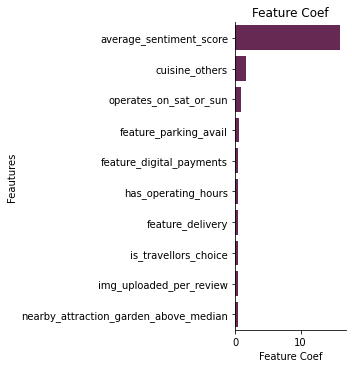

In [25]:
ax = sns.catplot(
    y = 'features',
    x = 'coef',
    data = df_coef.sort_values(by=['coef'], ascending=False).head(10),
    kind='bar',
    # hue='feature_category',
    color=hex_colors[1]
)

# ax.fig.gca().set(xlim=(3.5,4.1))
ax.fig.gca().set_title("Feature Coef")
ax.fig.gca().set_ylabel("Feautures")
ax.fig.gca().set_xlabel("Feature Coef")
plt.show()

In [26]:
df_coef.groupby(["feature_category"]).agg({"coef": ["min", "max", "mean"], "features": ["count"]}).sort_values(by=[("coef", "mean")], ascending=False)

coef                        \
                                                min        max       mean   
feature_category                                                            
Average Sentiment Score                   16.058274  16.058274  16.058274   
Is Travellors Choice                       0.430661   0.430661   0.430661   
Img Uploaded Per Review                    0.427917   0.427917   0.427917   
Above Median Dist From Nearby Attraction   0.129739   0.129739   0.129739   
Operating Hours Features                  -0.791780   0.922798   0.086794   
Walking Distance                           0.000059   0.000059   0.000059   
Cuisine OHE                               -0.791128   1.594994  -0.050089   
Meal OHE                                  -0.447876   0.360501  -0.073206   
Nearby Attraction Feature Cross           -1.041546   0.387337  -0.079772   
Diet OHE                                  -0.810023   0.267496  -0.197315   
Feature OHE                               -1.001329   0.553397  -0.221523   
Is In Mall                                -0.448882  -0.448882  -0.448882   
Is Michellin                              -0.466177  -0.466177  -0.466177   
Region OHE                                -1.597386  -0.302889  -0.912871   
Nearby Attraction OHE                     -1.551472  -0.175555  -0.942220   
Nearest Train Station Color OHE           -1.216048  -0.938857  -1.064665   

                                         features  
                                            count  
feature_category                                   
Average Sentiment Score                         1  
Is Travellors Choice                            1  
Img Uploaded Per Review                         1  
Above Median Dist From Nearby Attraction        1  
Operating Hours Features                        6  
Walking Distance                                1  
Cuisine OHE                                    13  
Meal OHE                                        7  
Nearby Attraction Feature Cross                12  
Diet OHE                                        4  
Feature OHE                                    15  
Is In Mall                                      1  
Is Michellin                                    1  
Region OHE                                     22  
Nearby Attraction OHE                          13  
Nearest Train Station Color OHE                 6

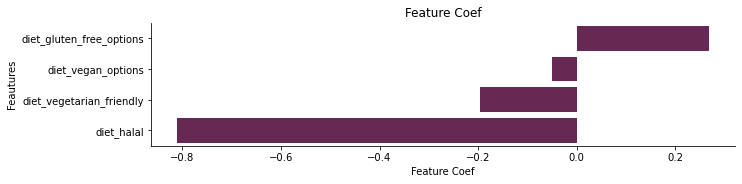

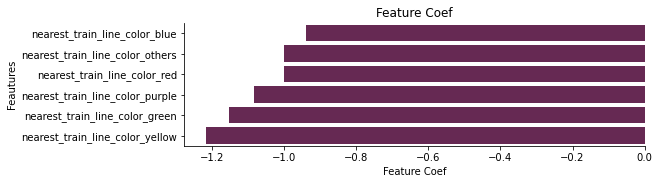

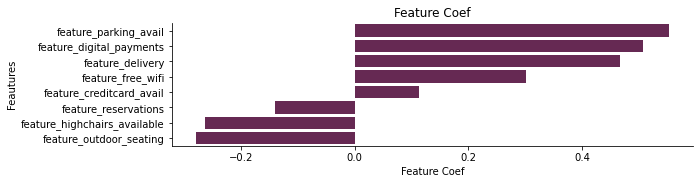

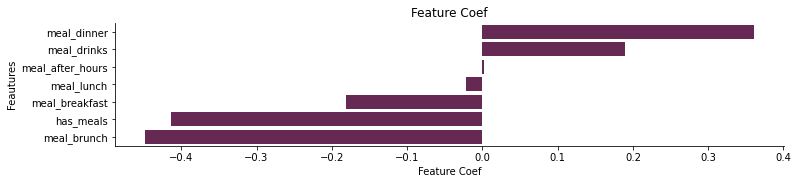

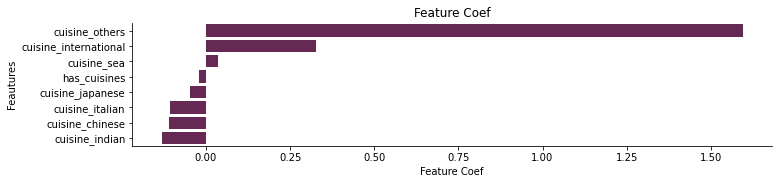

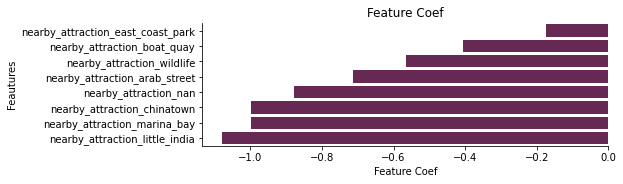

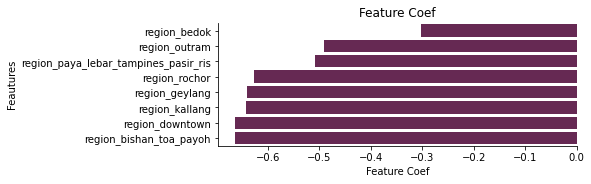

In [27]:
for i in ["Diet OHE", "Nearest Train Station Color OHE", "Feature OHE", "Meal OHE", "Cuisine OHE", "Nearby Attraction OHE", "Region OHE"]:
    ax = sns.catplot(
        y = 'features',
        x = 'coef',
        data = df_coef[df_coef["feature_category"]==i].sort_values(by=['coef'], ascending=False).head(8),
        kind='bar',
        # hue='feature_category',
        color=hex_colors[1]
    )

    # ax.fig.gca().set(xlim=(3.5,4.1))
    ax.fig.set_figheight(2)
    ax.fig.set_figwidth(15)
    ax.fig.gca().set_title("Feature Coef")
    ax.fig.gca().set_ylabel("Feautures")
    ax.fig.gca().set_xlabel("Feature Coef")
    plt.show()